/var/folders/n6/qvygqx8j3tbbks5cjpdffh5c0000gp/T/ipykernel_67067/1303268398.py:229: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


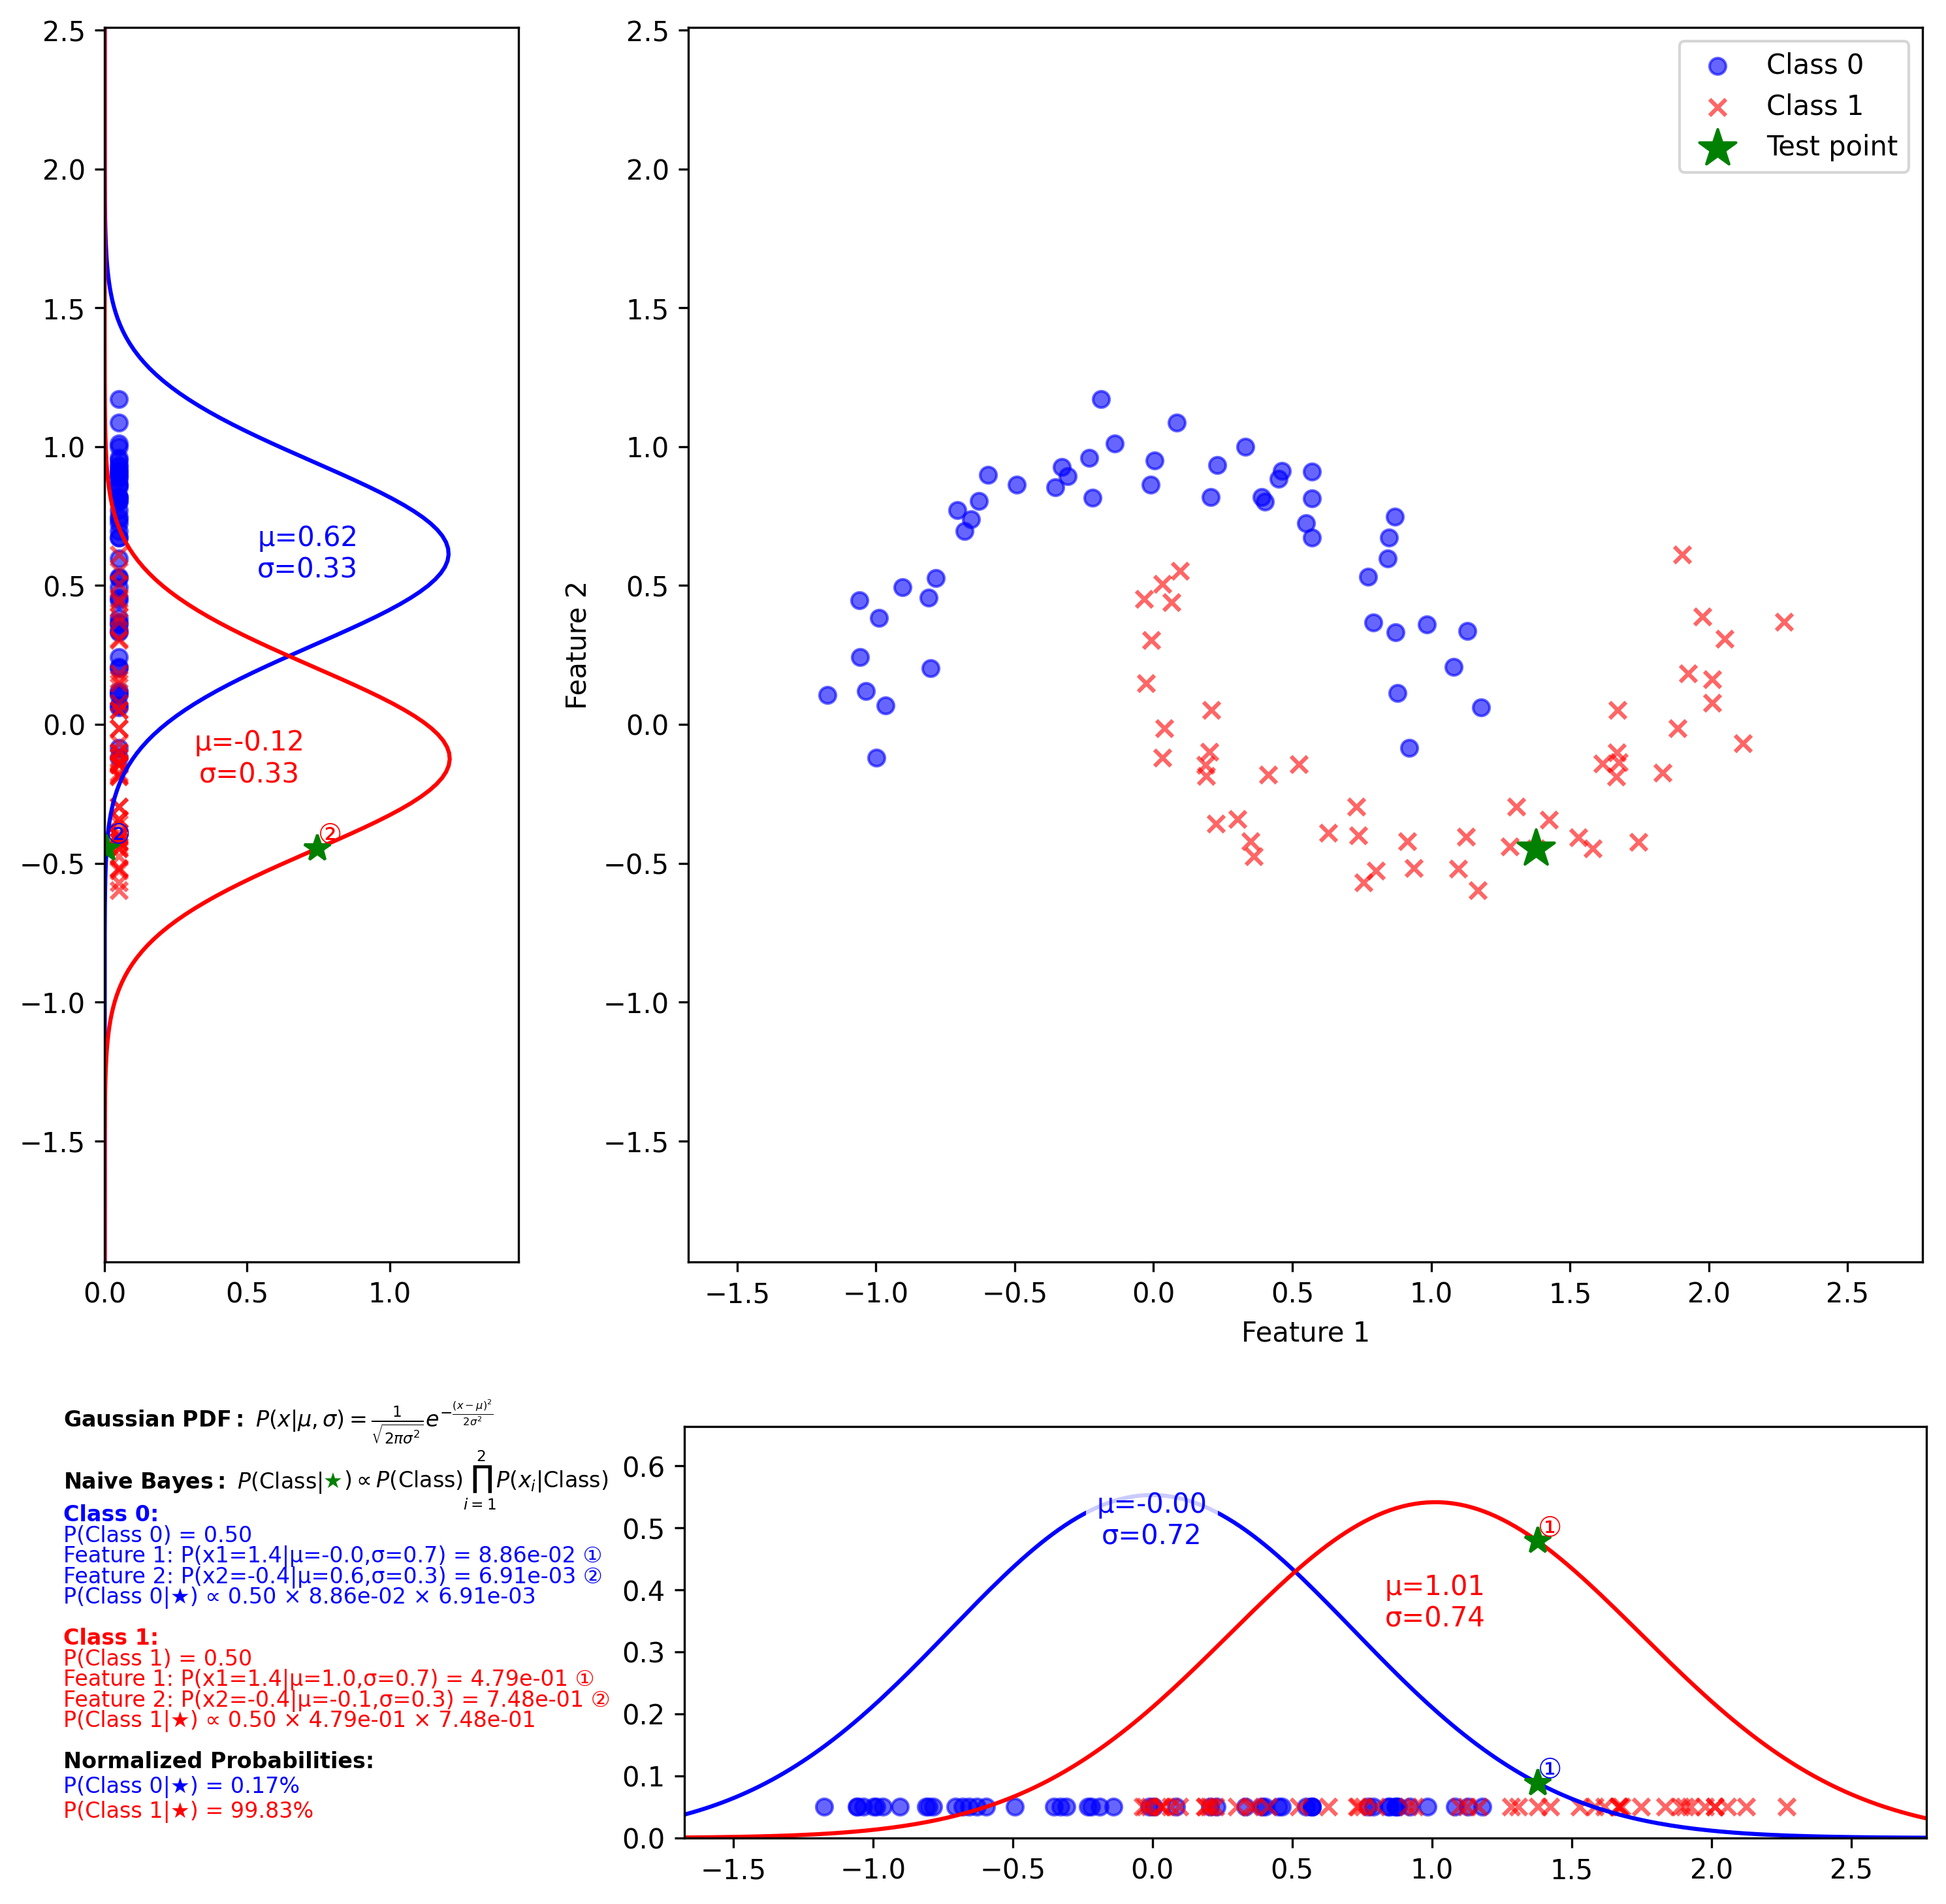

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
from matplotlib.gridspec import GridSpec

def gaussian_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var)

def plot_naive_bayes_visualization(X, y):
    # Fit the Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X, y)
    
    # Randomly select a test point from the dataset
    random_index = np.random.randint(0, len(X))
    test_point = X[random_index]
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(12, 12), dpi=300)
    
    # Adjust the GridSpec to make the distribution plots proportional
    gs = GridSpec(2, 2, width_ratios=[1, 3], height_ratios=[3, 1])
    gs.update(wspace=0.2, hspace=0.2)  # Reduced hspace from 0.3 to 0.1
    
    # Calculate data ranges with padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Ensure square aspect ratio by making ranges equal
    x_range = x_max - x_min
    y_range = y_max - y_min
    max_range = max(x_range, y_range)
    x_center = (x_max + x_min) / 2
    y_center = (y_max + y_min) / 2
    
    x_min = x_center - max_range/2
    x_max = x_center + max_range/2
    y_min = y_center - max_range/2
    y_max = y_center + max_range/2
    
    # Main scatter plot (top-right)
    ax_scatter = fig.add_subplot(gs[0, 1])
    classes = np.unique(y)
    colors = ['blue', 'red']
    markers = ['o', 'x']
    
    for i, cls in enumerate(classes):
        mask = y == cls
        ax_scatter.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Class {i}', alpha=0.6, marker=markers[i])
    
    # Plot test point
    ax_scatter.scatter(test_point[0], test_point[1], marker='*', c='green', s=200, label='Test point')
    
    # Set equal aspect ratio and limits for scatter plot
    ax_scatter.set_aspect('equal', adjustable='box')
    ax_scatter.set_xlim(x_min, x_max)
    ax_scatter.set_ylim(y_min, y_max)
    ax_scatter.set_xlabel('Feature 1')
    ax_scatter.set_ylabel('Feature 2')
    ax_scatter.legend()
    
    # Feature 2 distribution (left)
    ax_dist2 = fig.add_subplot(gs[0, 0], sharey=ax_scatter)
    pdfs_2 = []
    
    # Calculate max PDF value for consistent scaling
    max_pdf_value = 0
    for i, cls in enumerate(classes):
        mask = y == cls
        data = X[mask, 1]
        mean = gnb.theta_[i, 1]
        y_range = np.linspace(y_min, y_max, 200)
        gaussian = gaussian_pdf(y_range, mean, gnb.var_[i, 1])
        max_pdf_value = max(max_pdf_value, np.max(gaussian))
    
    # Set x-limit for left distribution plot based on max PDF value
    pdf_limit = max_pdf_value * 1.2  # Add 20% padding
    
    for i, cls in enumerate(classes):
        mask = y == cls
        data = X[mask, 1]
        mean = gnb.theta_[i, 1]
        std = np.sqrt(gnb.var_[i, 1])
        
        y_range = np.linspace(y_min, y_max, 200)
        gaussian = gaussian_pdf(y_range, mean, gnb.var_[i, 1])
        ax_dist2.plot(gaussian, y_range, color=colors[i])
        
        pdf_2 = gaussian_pdf(test_point[1], mean, gnb.var_[i, 1])
        pdfs_2.append(pdf_2)
        ax_dist2.plot([pdf_2], [test_point[1]], marker='*', c='green', markersize=10)
        
        ax_dist2.scatter(np.zeros_like(data) + 0.05, data, c=colors[i], marker=markers[i], alpha=0.6)
        
        x_pos = pdf_limit * 0.7 * (0.7 - i*0.2)
        ax_dist2.text(x_pos, mean, f'μ={mean:.2f}\nσ={std:.2f}', 
                     color=colors[i], ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax_dist2.set_xlim(0, pdf_limit)
    
    # Feature 1 distribution (bottom)
    ax_dist1 = fig.add_subplot(gs[1, 1], sharex=ax_scatter)
    pdfs_1 = []
    
    # Calculate max PDF value for bottom distribution
    max_pdf_value = 0
    for i, cls in enumerate(classes):
        mask = y == cls
        data = X[mask, 0]
        mean = gnb.theta_[i, 0]
        x_range = np.linspace(x_min, x_max, 200)
        gaussian = gaussian_pdf(x_range, mean, gnb.var_[i, 0])
        max_pdf_value = max(max_pdf_value, np.max(gaussian))
    
    # Set y-limit for bottom distribution plot based on max PDF value
    pdf_limit = max_pdf_value * 1.2  # Add 20% padding
    
    for i, cls in enumerate(classes):
        mask = y == cls
        data = X[mask, 0]
        mean = gnb.theta_[i, 0]
        std = np.sqrt(gnb.var_[i, 0])
        
        x_range = np.linspace(x_min, x_max, 200)
        gaussian = gaussian_pdf(x_range, mean, gnb.var_[i, 0])
        ax_dist1.plot(x_range, gaussian, color=colors[i])
        
        pdf_1 = gaussian_pdf(test_point[0], mean, gnb.var_[i, 0])
        pdfs_1.append(pdf_1)
        ax_dist1.plot([test_point[0]], [pdf_1], marker='*', c='green', markersize=10)
        
        ax_dist1.scatter(data, np.zeros_like(data) + 0.05, c=colors[i], marker=markers[i], alpha=0.6)
        
        y_pos = pdf_limit * (0.7 - i*0.2)
        ax_dist1.text(mean, y_pos, f'μ={mean:.2f}\nσ={std:.2f}', 
                     color=colors[i], ha='center', va='bottom',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax_dist1.set_ylim(0, pdf_limit)
    
    # Add calculation text in bottom-left
    ax_calc = fig.add_subplot(gs[1, 0])
    ax_calc.axis('off')
    
    # Calculate class probabilities
    priors = [len(X[y == c])/len(X) for c in classes]
    class_probs = []
    for i in range(len(classes)):
        prob = priors[i] * pdfs_1[i] * pdfs_2[i]
        class_probs.append(prob)
    
    total = sum(class_probs)
    normalized_probs = [p/total for p in class_probs]

    # # Initialize the starting y position
    current_y = 1

    font_size = 8
    x_start = -0.1
    
    # # First formula (no color needed)
    ax_calc.text(x_start, current_y, r"$\mathbf{Gaussian\ PDF:}\ P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$", fontsize=font_size, fontweight='bold')
    current_y -= 0.15

    # # Formula with colored star (split into parts)
    formula_start = r"$\mathbf{Naive\ Bayes:}\ P(\text{Class}|$"
    star = "★"
    formula_end = r"$) \propto P(\text{Class}) \prod_{i=1}^2 P(x_i|\text{Class})$"
    
    # # Place each part with appropriate color
    x_pos = x_start
    ax_calc.text(x_pos, current_y, formula_start, fontsize=font_size, fontweight='bold')
    text_width = len(formula_start) * 0.017  # Approximate width of text
    x_pos += text_width - 0.07
    
    ax_calc.text(x_pos, current_y, star, fontsize=font_size, fontweight='bold', color='green')
    x_pos += 0.05  # Width of star
    
    ax_calc.text(x_pos, current_y, formula_end, fontsize=font_size, fontweight='bold')
    
    current_y -= 0.08  # Extra space
    
    for i in range(len(classes)):
        # Get parameters for this class
        mu1, mu2 = gnb.theta_[i]
        var1, var2 = gnb.var_[i]
        pdf1 = pdfs_1[i]
        pdf2 = pdfs_2[i]
        prior = len(y[y == i]) / len(y)  # P(Class_k)
        
        class_text = f"Class {i}:"
        prior_text = f"P(Class {i}) = {prior:.2f}"
        feature1 = f"Feature 1: P(x1={test_point[0]:.1f}|μ={mu1:.1f},σ={np.sqrt(var1):.1f}) = {pdf1:.2e} ①"
        feature2 = f"Feature 2: P(x2={test_point[1]:.1f}|μ={mu2:.1f},σ={np.sqrt(var2):.1f}) = {pdf2:.2e} ②"
        prob_calc = f"P(Class {i}|★) ∝ {prior:.2f} × {pdf1:.2e} × {pdf2:.2e}"
        
        # Add texts with colors
        ax_calc.text(x_start, current_y, class_text, color=colors[i], fontsize=font_size, fontweight='bold')
        current_y -= 0.05
        ax_calc.text(x_start, current_y, prior_text, color=colors[i], fontsize=font_size)
        current_y -= 0.05
        ax_calc.text(x_start, current_y, feature1, color=colors[i], fontsize=font_size)
        current_y -= 0.05
        ax_calc.text(x_start, current_y, feature2, color=colors[i], fontsize=font_size)
        current_y -= 0.05
        ax_calc.text(x_start, current_y, prob_calc, color=colors[i], fontsize=font_size)
        current_y -= 0.1
        
    # Add final probabilities
    ax_calc.text(x_start, current_y, "Normalized Probabilities:", fontsize=font_size, fontweight='bold')
    current_y -= 0.06
    
    for i in range(len(classes)):
        prob_text = f"P(Class {i}|★) = {normalized_probs[i]:.2%}"
        ax_calc.text(x_start, current_y, prob_text, color=colors[i], fontsize=font_size)
        current_y -= 0.06
    
    # Add small markers/references next to the distributions
    # to indicate which points correspond to ① and ②
    for i, cls in enumerate(classes):
        # Mark points on Feature 1 distribution
        ax_dist1.text(test_point[0], pdfs_1[i], f'①', color=colors[i], ha='left', va='bottom')
        
        # Mark points on Feature 2 distribution
        ax_dist2.text(pdfs_2[i], test_point[1], f'②', color=colors[i], ha='left', va='bottom')
    
    plt.tight_layout()
    return fig

# Generate sample data with controlled range
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)
# X, y = make_circles(n_samples=100, noise=0.1, random_state=42)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Create and display the visualization
fig = plot_naive_bayes_visualization(X, y)
plt.show()